# freshness prediction

## Importing Libraries:

In [9]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt


###  Load pre-trained ResNet50 model for feature extraction

In [12]:

base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')


## Feature Extraction

In [15]:
def extract_features(image_paths, img_size=(224, 224)):
    features = []
    for img_path in image_paths:
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=img_size)
        img = tf.keras.preprocessing.image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        img = tf.keras.applications.resnet50.preprocess_input(img)
        feature = base_model.predict(img)
        features.append(feature.flatten())
    return np.array(features)

## Loading Image Paths 

In [18]:
def load_images(dataset_path):
    image_paths = []
    labels = []
    label_map = {'class1': 0, 'class2': 1, 'class3': 2}
    for main_class in os.listdir(dataset_path):
        main_class_path = os.path.join(dataset_path, main_class)
        if os.path.isdir(main_class_path):
            for sub_class in os.listdir(main_class_path):
                sub_class_path = os.path.join(main_class_path, sub_class)
                if os.path.isdir(sub_class_path):
                    for img_file in os.listdir(sub_class_path):
                        img_path = os.path.join(sub_class_path, img_file)
                        image_paths.append(img_path)
                        labels.append(label_map[main_class])
    return image_paths, labels


##   K-Means Clustering for Freshness

In [21]:

def cluster_freshness(features, n_clusters=3):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(features)
    return clusters, kmeans

## Linear Regression for Shelf Life Prediction

In [24]:

def predict_shelf_life(features, shelf_life_days):
    regressor = LinearRegression()
    regressor.fit(features, shelf_life_days)
    return regressor

## Linear Regression for Freshness Prediction

In [27]:
def predict_freshness(features, freshness_percentages):
    regressor = LinearRegression()
    regressor.fit(features, freshness_percentages)
    return regressor

## Visualization of Clusters

In [30]:
def visualize_clusters(image_paths, clusters):
    for cluster_num in np.unique(clusters):
        cluster_indices = np.where(clusters == cluster_num)[0]
        print(f"\nCluster {cluster_num}:")
        for idx in cluster_indices[:5]:  # Display first 5 images in each cluster
            img = tf.keras.preprocessing.image.load_img(image_paths[idx], target_size=(100, 100))
            plt.imshow(img)
            plt.axis('off')
            plt.show()

## Main Workflow

In [35]:
def main(dataset_path, shelf_life_labels, freshness_percentages):
    # Step 1: Load images and extract features using CNN
    image_paths, labels = load_images(dataset_path)
    features = extract_features(image_paths)
    
    # Ensure the number of shelf life labels and freshness percentages match the number of features
    if len(features) != len(shelf_life_labels) or len(features) != len(freshness_percentages):
        raise ValueError("Number of shelf life labels and freshness percentages must match the number of features extracted")
    
    # Step 2: Apply K-Means to cluster images based on freshness levels
    freshness_clusters, kmeans_model = cluster_freshness(features, n_clusters=3)
    
    # Step 3: Normalize shelf life labels
    shelf_life_scaler = RobustScaler()
    normalized_shelf_life_labels = shelf_life_scaler.fit_transform(np.array(shelf_life_labels).reshape(-1, 1)).flatten()
    
    # Step 4: Normalize freshness percentages
    freshness_scaler = RobustScaler()
    normalized_freshness_percentages = freshness_scaler.fit_transform(np.array(freshness_percentages).reshape(-1, 1)).flatten()
    
    # Step 5: Predict shelf life using linear regression
    shelf_life_regressor = predict_shelf_life(features, normalized_shelf_life_labels)
    
    # Step 6: Predict freshness percentage using linear regression
    freshness_regressor = predict_freshness(features, normalized_freshness_percentages)

    # Visualize the clustering result (optional)
    visualize_clusters(image_paths, freshness_clusters)

    return freshness_clusters, shelf_life_regressor, freshness_regressor, shelf_life_scaler, freshness_scaler, features, labels


## Generating Labels for the Dataset:

Processing class1: found 516 images, expected 516 images
Processing class2: found 348 images, expected 348 images
Processing class3: found 678 images, expected 678 images
Total images processed: 1542
Total shelf life labels: 1542
Total freshness labels: 1542
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1

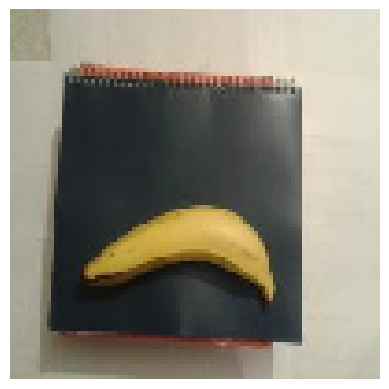

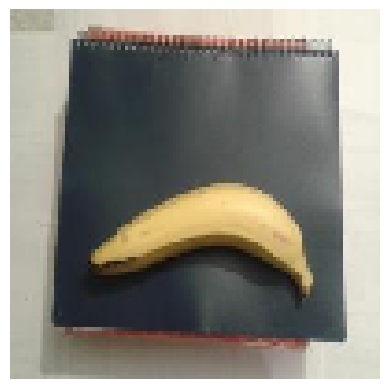

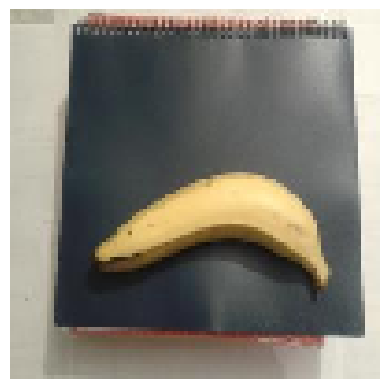

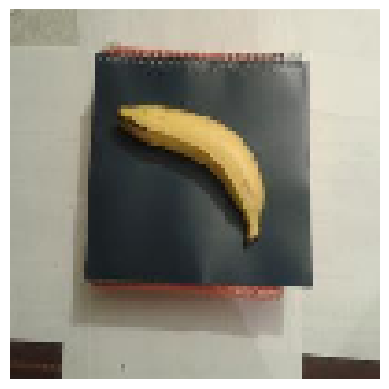

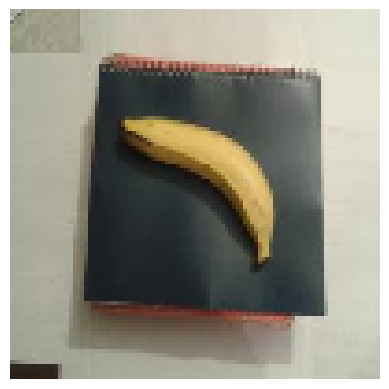


Cluster 1:


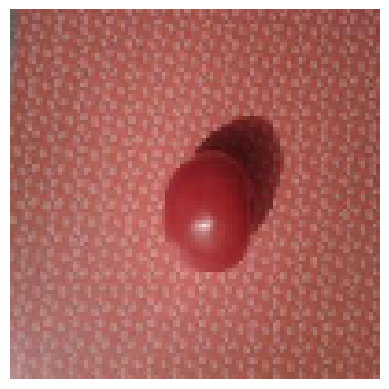

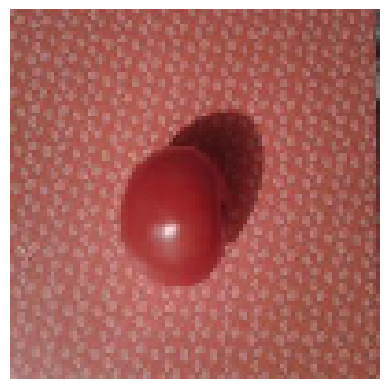

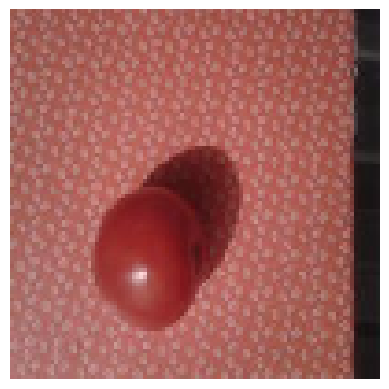

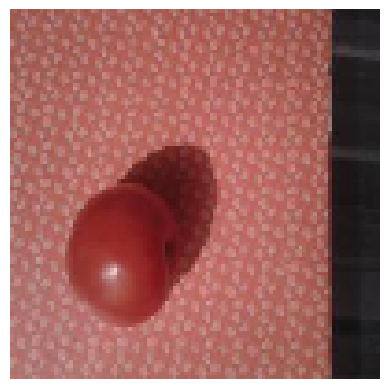

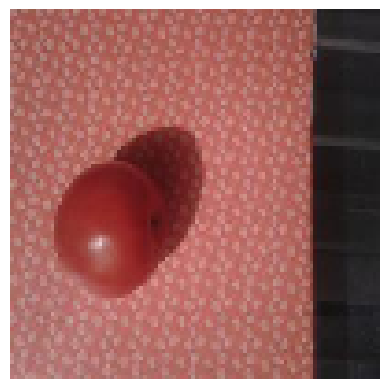


Cluster 2:


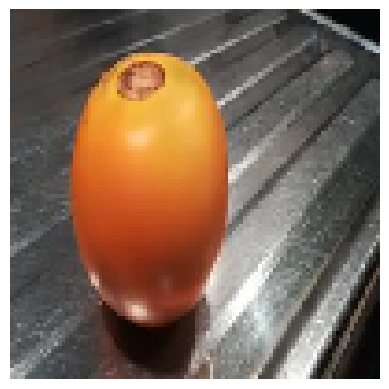

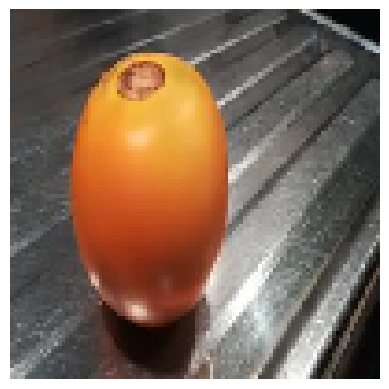

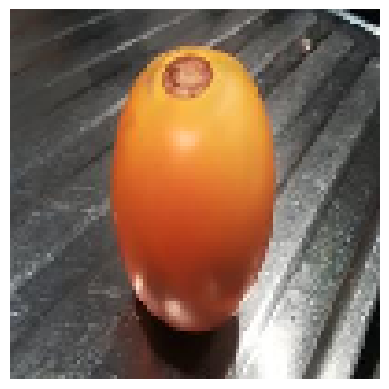

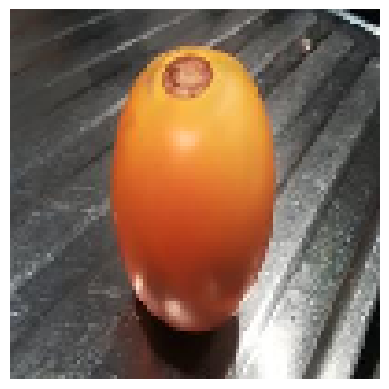

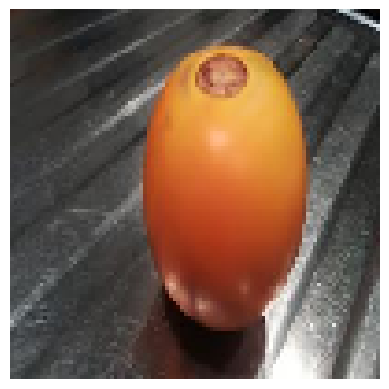

In [38]:
import os
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Base patterns
shelf_life_patterns = {
    'class1': [30, 26, 23, 20, 19, 28],
    'class2': [15, 16, 12, 9, 6, 7],
    'class3': [4, 5, 3, 2, 1, 0]
}

freshness_patterns = {
    'class1': [100, 90, 80, 70, 85, 95],
    'class2': [70, 60, 50, 40, 45, 65],
    'class3': [40, 35, 30, 25, 20, 10]
}

# Function to generate labels
def generate_labels(pattern, num_images, max_value):
    repeat_count = num_images // len(pattern)
    remaining_count = num_images % len(pattern)
    labels = pattern * repeat_count + pattern[:remaining_count]
    scaler = MinMaxScaler(feature_range=(0, max_value))
    labels = scaler.fit_transform(np.array(labels).reshape(-1, 1)).flatten()
    return labels

# Function to recursively collect all image paths from a directory
def collect_image_paths(directory):
    image_paths = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):
                image_paths.append(os.path.join(root, file))
    return image_paths

# Load the dataset
dataset_path = 'C:\\Users\\DELL\\Documents\\smart_vision_project\\freshness\\dataset\\train'
classes = ['class1', 'class2', 'class3']

# Generate labels for each class
shelf_life_labels = []
freshness_labels = []
image_paths = []

total_image_counts = {'class1': 516, 'class2': 348, 'class3': 678}  # Provided image counts

for class_name in classes:
    class_dir = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_dir):
        class_image_paths = collect_image_paths(class_dir)
        image_paths.extend(class_image_paths)

        num_images = len(class_image_paths)
        expected_images = total_image_counts[class_name]
        
        print(f"Processing {class_name}: found {num_images} images, expected {expected_images} images")  # Debug statement
        
        if num_images != expected_images:
            print(f"Warning: Number of images in {class_name} does not match expected count!")

        if num_images > 0:
            shelf_life_labels.extend(generate_labels(shelf_life_patterns[class_name], num_images, max_value=30))
            freshness_labels.extend(generate_labels(freshness_patterns[class_name], num_images, max_value=100))

# Convert lists to numpy arrays
shelf_life_labels = np.array(shelf_life_labels)
freshness_labels = np.array(freshness_labels)

# Ensure the labels match the number of images
assert len(shelf_life_labels) == len(image_paths), f"Mismatch in shelf life labels: {len(shelf_life_labels)} vs {len(image_paths)}"
assert len(freshness_labels) == len(image_paths), f"Mismatch in freshness labels: {len(freshness_labels)} vs {len(image_paths)}"

print(f"Total images processed: {len(image_paths)}")
print(f"Total shelf life labels: {len(shelf_life_labels)}")
print(f"Total freshness labels: {len(freshness_labels)}")

# Run the model
freshness_clusters, shelf_life_predictor, freshness_predictor, shelf_life_scaler, freshness_scaler, features, image_labels = main(dataset_path, shelf_life_labels, freshness_labels)


## Prediction for New Items

In [78]:
def predict_new_item_shelf_life_and_freshness(image_path, features, freshness_clusters):
    # Extract features of the new image
    img_features = extract_features([image_path])
    
    # Predict shelf life and freshness percentage
    predicted_shelf_life = shelf_life_predictor.predict(img_features)
    predicted_freshness = freshness_predictor.predict(img_features)
    
    # Find the closest cluster (class) based on feature distance
    distances = np.linalg.norm(features - img_features, axis=1)
    closest_cluster_idx = np.argmin(distances)
    class_prediction = freshness_clusters[closest_cluster_idx]
    
    # Map cluster index to class name
    class_map = {0: 'class1', 1: 'class2', 2: 'class3'}
    
    # Apply class-specific constraints
    if class_prediction == 0:  # class1
        predicted_freshness_percentage = max(70, min(100, predicted_freshness[0]))
        predicted_shelf_life = max(6, min(30, predicted_shelf_life[0]))
    elif class_prediction == 1:  # class2
        predicted_freshness_percentage = max(40, min(70, predicted_freshness[0]))
        predicted_shelf_life = max(3, min(15, predicted_shelf_life[0]))
    elif class_prediction == 2:  # class3
        predicted_freshness_percentage = max(0, min(40, predicted_freshness[0]))
        predicted_shelf_life = max(0, min(6, predicted_shelf_life[0]))
    
    return predicted_shelf_life, predicted_freshness_percentage, class_map[class_prediction]


# Predict the shelf life, freshness percentage, and class for a new image
new_image_path = 'C:\\Users\\DELL\\Documents\\smart_vision_project\\freshness\\bread4.jpeg'

predicted_days_left, predicted_freshness_percentage, predicted_class = predict_new_item_shelf_life_and_freshness(new_image_path, features, freshness_clusters)

print(f"Predicted shelf life (days left): {predicted_days_left}")
print(f"Predicted freshness percentage: {predicted_freshness_percentage}")
print(f"Predicted class: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
Predicted shelf life (days left): 6
Predicted freshness percentage: 70
Predicted class: class1


In [64]:
import os

def count_images(directory):
    # Define the image file extensions you want to count
    image_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff')
    
    # Initialize a counter
    total_images = 0
    
    # Walk through all directories and subdirectories
    for root, _, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(image_extensions):
                total_images += 1
    
    return total_images

# Replace 'your_directory_path' with the path to your directory
directory_path = 'C:\\Users\\DELL\\Documents\\smart_vision_project\\freshness\\dataset\\train\\class1'
print(f"Total number of images in the directory: {count_images(directory_path)}")


Total number of images in the directory: 516


In [ ]:
516
348
678